In this lesson, you will learn bivariate exploratory data analysis in Pandas, where the distribution of some features are examined in relation to other features. We will use the same on-time performance of dometics flights as before. The original data for this exercise was downloaded from [Kaggle](https://www.kaggle.com/usdot/flight-delays).



We will explore the data in relation to the following questions:

1. How does a feature vary with other features?

2. How are the features related to a target variable of interest?


As the file size is large, and it is easy to run into memory issue, we will be working with only flights departed from Chicago O'Hare airport (ORD) in this exercise.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "/home/asimbanskota/t81_577_data_science/weekly_materials/week7/files"

In [3]:
pd.set_option("display.precision", 2)

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'ORD.csv'))

In [5]:
df.shape

(285884, 32)

In [6]:
df_airlines = pd.read_csv(os.path.join(DATA_DIR, 'airlines.csv'))
df_airport = pd.read_csv(os.path.join(DATA_DIR, 'airports.csv'))

Let's calculate the delay category class as we did in the univariate EDA.

In [7]:
df['delay_class'] = pd.cut(x=df['DEPARTURE_DELAY'], bins=[df['DEPARTURE_DELAY'].min(), 7, 20, 45, df['DEPARTURE_DELAY'].max()],
                            labels=['no_delay', 'small_delay', 'moderate_delay', 'large_delay'])

### Flight delay by airlines

It is likely that flight delay might be more specific to certain airports as well as airlines. As this dataset is related to the flights departed from ORD airport only, we can't explore the delay patter across airports. But the analysis below for airlines can similarly be applied to all airports data if needed.

Pandas have several methods such as `groupby`, `pivot` , `pivot_table`, and `crosstab`. Among them, `crosstab` probably provides the easiets and quickeest way of summarizing count data.


The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.

In [8]:
pd.crosstab(df["delay_class"], df["AIRLINE"], margins=True, margins_name="Total")

AIRLINE,AA,AS,B6,DL,EV,F9,MQ,NK,OO,UA,US,VX,Total
delay_class,,,,,,,,,,,,,
no_delay,35137,1390,1475,5028,32198,2772,43366,5089,25343,35621,2690,940,191049
small_delay,5071,156,241,753,3828,541,5565,1467,3637,8229,236,204,29928
moderate_delay,4386,94,218,553,3104,557,5374,1353,3287,6265,216,131,25538
large_delay,5176,100,281,602,3673,700,5805,1796,4373,8408,218,99,31231
Total,49770,1740,2215,6936,42803,4570,60110,9705,36640,58523,3360,1374,277746


The crosstab results show that the MQ, AA, and UA have the most number of moderate and large delays, but they are also among the big carrieres at ORD. So normalization of data would probably give a better picture.

Also, it is little difficult to figure out what all those airline codes stand for. Thus, we need to join the airlines data to the dataframe for mapping those codes. 

In [9]:
df = df.merge(df_airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE', suffixes=('_fl', '_air'))

In [10]:
pd.crosstab(df["delay_class"], df["AIRLINE_air"], normalize = 'columns')

AIRLINE_air,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
delay_class,,,,,,,,,,,,
no_delay,0.80,0.71,0.72,0.75,0.72,0.61,0.67,0.69,0.52,0.80,0.61,0.68
small_delay,0.09,0.10,0.09,0.09,0.11,0.12,0.11,0.10,0.15,0.07,0.14,0.15
moderate_delay,0.05,0.09,0.09,0.07,0.08,0.12,0.10,0.09,0.14,0.06,0.11,0.10
large_delay,0.06,0.10,0.10,0.09,0.09,0.15,0.13,0.12,0.19,0.06,0.14,0.07


Determine the mean delay values by airlines using `groupby` and then sort the average delay in the descending order.

Note: the same thing can be achieved using `crosstab` too.


In [11]:
df_delay = df[df['delay_class']!='no_delay']

In [12]:
df_delay.groupby('AIRLINE_air')['DEPARTURE_DELAY'].mean().sort_values(ascending = False)

AIRLINE_air
Frontier Airlines Inc.          61.81
JetBlue Airways                 61.32
Delta Air Lines Inc.            56.25
Spirit Air Lines                54.25
United Air Lines Inc.           52.89
Skywest Airlines Inc.           51.40
American Airlines Inc.          51.02
US Airways Inc.                 50.08
Alaska Airlines Inc.            49.29
Atlantic Southeast Airlines     48.54
American Eagle Airlines Inc.    45.96
Virgin America                  39.62
Name: DEPARTURE_DELAY, dtype: float64

### Visualization

#### Categorical plots

The relationship between two or more features can be analyzed graphically in many ways. Categorical scatterplot can used to to vizualize the scatter of quantitative values (such as delays) against categorical features (such as airlines). `catplot` method by seaborn can be used for the purpose.

In [ ]:
#plt.figure(figsize = (20,6))
sns.catplot(x = "AIRLINE_fl", y = "DEPARTURE_DELAY", kind = "swarm",  data = df_delay, height = 5, aspect = 2);

Catplot method can also be used to create boxplots for multiple comparision of distribution across different categories

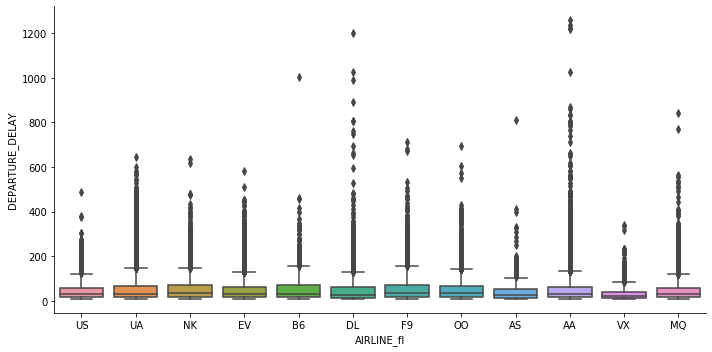

In [14]:
sns.catplot(x = "AIRLINE_fl", y = "DEPARTURE_DELAY", data = df_delay, kind = "box", height = 5, aspect = 2);


It might be helful sometimes to show an estimate of the central tendency of the values by categories rather than distribution. 

Plot the average (mean) delay by airlines.

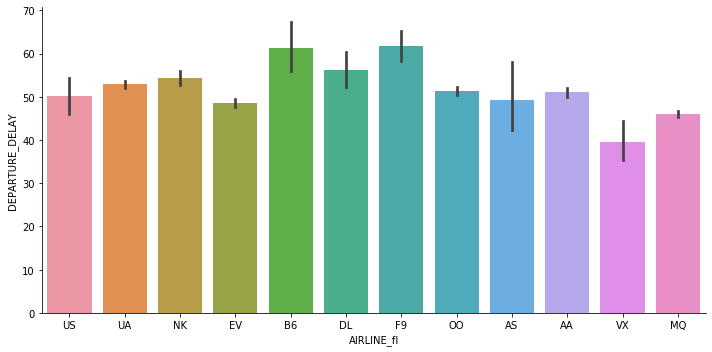

In [15]:
sns.catplot(x = "AIRLINE_fl", y = "DEPARTURE_DELAY", data = df_delay, kind = "bar", height = 5, aspect = 2);

Plot the count of delays by delay categories and by airlines.

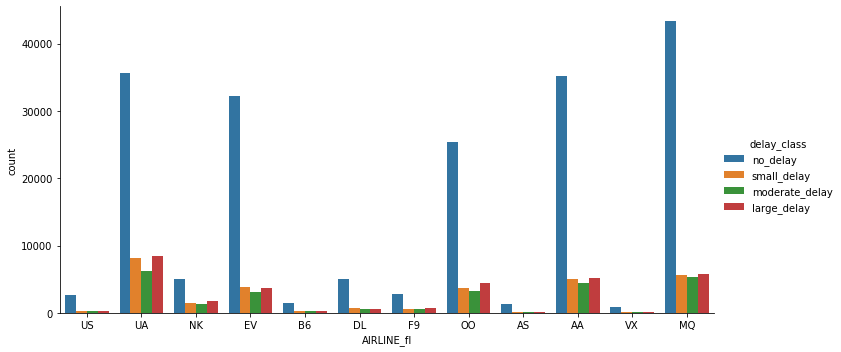

In [16]:
sns.catplot(x = "AIRLINE_fl",  data = df, kind = "count", hue = "delay_class",height = 5, aspect = 2);

#### Scatter plots

Scatter plot can be used to explore the relationship between continious variables. One thing we could check is how the departure delay varies by time and days. But we will do that in the next section of temporal analysis. Here, we will inspect if the DEPARTURE_DELAY depends upon the travel distance to the destination.

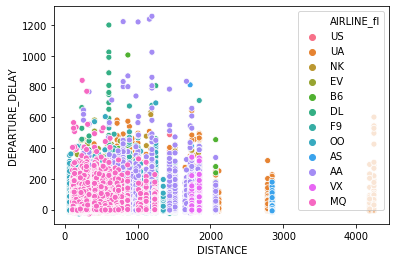

In [17]:
sns.scatterplot(x = "DISTANCE",  y = "DEPARTURE_DELAY", data = df, hue = "AIRLINE_fl");